## <div style="background:#ffcea0; padding:1rem 2rem">Project Info</div>

## <div style="background:#ffcea0; padding:1rem 2rem"> Loading Preprocessing Data</div>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = [15,8]
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.left"] = False
plt.rcParams["axes.spines.right"] = False

import warnings
warnings.filterwarnings('ignore')

In [5]:
aot = pd.read_csv('dataset/air_quality/Aotizhongxin_20130301-20170228.csv')
chan = pd.read_csv('dataset/air_quality/Changping_20130301-20170228.csv')
ding = pd.read_csv('dataset/air_quality/Dingling_20130301-20170228.csv')
dong = pd.read_csv('dataset/air_quality/Dongsi_20130301-20170228.csv')
guan = pd.read_csv('dataset/air_quality/Guanyuan_20130301-20170228.csv')
guch = pd.read_csv('dataset/air_quality/Gucheng_20130301-20170228.csv')
hua = pd.read_csv('dataset/air_quality/Huairou_20130301-20170228.csv')
nong = pd.read_csv('dataset/air_quality/Nongzhanguan_20130301-20170228.csv')
shu = pd.read_csv('dataset/air_quality/Shunyi_20130301-20170228.csv')
tian = pd.read_csv('dataset/air_quality/Tiantan_20130301-20170228.csv')
wan = pd.read_csv('dataset/air_quality/Wanliu_20130301-20170228.csv')
wans = pd.read_csv('dataset/air_quality/Wanshouxigong_20130301-20170228.csv')

In [6]:
dfs = [aot, chan, ding, dong, guan, 
       guch, hua, nong, shu, tian, 
       wan, wans]

air_quality = pd.concat(dfs).reset_index(drop=True).drop('No', 1)
air_quality.head()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [7]:
air_quality.tail()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
420763,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong
420764,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong
420765,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong
420766,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong
420767,2017,2,28,23,13.0,19.0,4.0,38.0,600.0,49.0,8.6,1014.1,-15.9,0.0,NNE,1.3,Wanshouxigong


In [8]:
# columns normalization and renaming

air_quality.columns = air_quality.columns.str.lower()

air_quality.rename(columns={'pm2.5':'pm25'}, inplace=True)


air_quality.sample(5)

,year,month,day,hour,pm25,pm10,so2,no2,co,o3,temp,pres,dewp,rain,wd,wspm,station
409853,2015,12,2,5,10.0,10.0,7.0,32.0,800.0,28.0,1.3,1016.8,-12.2,0.0,NW,3.7,Wanshouxigong
151775,2014,6,23,23,24.0,67.0,2.0,58.0,700.0,84.0,22.1,1000.1,17.9,0.0,NW,0.0,Guanyuan
191684,2015,1,11,20,128.0,186.0,62.0,94.0,2500.0,5.0,2.0,1025.0,-7.9,0.0,WNW,1.4,Gucheng
243262,2016,11,29,22,81.0,93.0,4.0,48.0,1400.0,6.0,2.2,1021.2,-1.2,0.0,W,2.2,Huairou
193253,2015,3,18,5,26.0,42.0,10.0,33.0,600.0,49.0,7.5,1009.9,-9.0,0.0,SW,0.8,Gucheng


In [9]:
# data info

air_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 17 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   year     420768 non-null  int64  
 1   month    420768 non-null  int64  
 2   day      420768 non-null  int64  
 3   hour     420768 non-null  int64  
 4   pm25     412029 non-null  float64
 5   pm10     414319 non-null  float64
 6   so2      411747 non-null  float64
 7   no2      408652 non-null  float64
 8   co       400067 non-null  float64
 9   o3       407491 non-null  float64
 10  temp     420370 non-null  float64
 11  pres     420375 non-null  float64
 12  dewp     420365 non-null  float64
 13  rain     420378 non-null  float64
 14  wd       418946 non-null  object 
 15  wspm     420450 non-null  float64
 16  station  420768 non-null  object 
dtypes: float64(11), int64(4), object(2)
memory usage: 54.6+ MB


In [10]:
# checking null values

air_quality.isna().sum()

year           0
month          0
day            0
hour           0
pm25        8739
pm10        6449
so2         9021
no2        12116
co         20701
o3         13277
temp         398
pres         393
dewp         403
rain         390
wd          1822
wspm         318
station        0
dtype: int64

In [11]:
# percentage share of null values in each feature

air_quality.isna().sum() / len(air_quality) * 100

year       0.000000
month      0.000000
day        0.000000
hour       0.000000
pm25       2.076916
pm10       1.532674
so2        2.143937
no2        2.879497
co         4.919813
o3         3.155421
temp       0.094589
pres       0.093401
dewp       0.095777
rain       0.092688
wd         0.433018
wspm       0.075576
station    0.000000
dtype: float64

In [19]:
air_quality.describe().T

,count,mean,std,min,25%,50%,75%,max
year,420768.0,2014.662560,1.177198,2013.0000,2014.00,2015.0,2016.00,2017.0
month,420768.0,6.522930,3.448707,1.0000,4.00,7.0,10.00,12.0
day,420768.0,15.729637,8.800102,1.0000,8.00,16.0,23.00,31.0
hour,420768.0,11.500000,6.922195,0.0000,5.75,11.5,17.25,23.0
pm25,412029.0,79.793428,80.822391,2.0000,20.00,55.0,111.00,999.0
pm10,414319.0,104.602618,91.772426,2.0000,36.00,82.0,145.00,999.0
so2,411747.0,15.830835,21.650603,0.2856,3.00,7.0,20.00,500.0
no2,408652.0,50.638586,35.127912,1.0265,23.00,43.0,71.00,290.0
co,400067.0,1230.766454,1160.182716,100.0000,500.00,900.0,1500.00,10000.0
o3,407491.0,57.372271,56.661607,0.2142,11.00,45.0,82.00,1071.0


## <div style="background:#ffcea0; padding:1rem 2rem"> Outlier Detection </div>

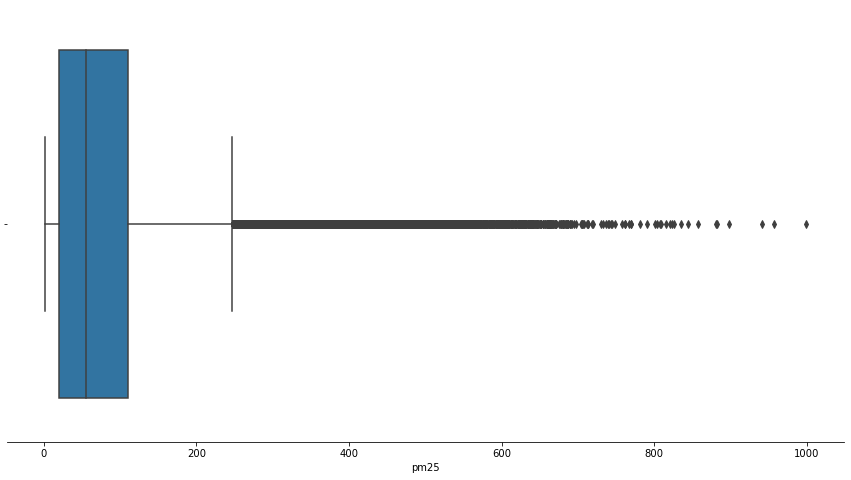

In [12]:
sns.boxplot(data=air_quality, x='pm25')
plt.show()

In [13]:
(air_quality.pm25 > 250).sum() # total pm25 values greater than 250

18436

In [14]:
pm25 = air_quality.loc[air_quality.pm25 > 250]

pm25.station.unique()

array(['Aotizhongxin', 'Changping', 'Dingling', 'Dongsi', 'Guanyuan',
       'Gucheng', 'Huairou', 'Nongzhanguan', 'Shunyi', 'Tiantan',
       'Wanliu', 'Wanshouxigong'], dtype=object)

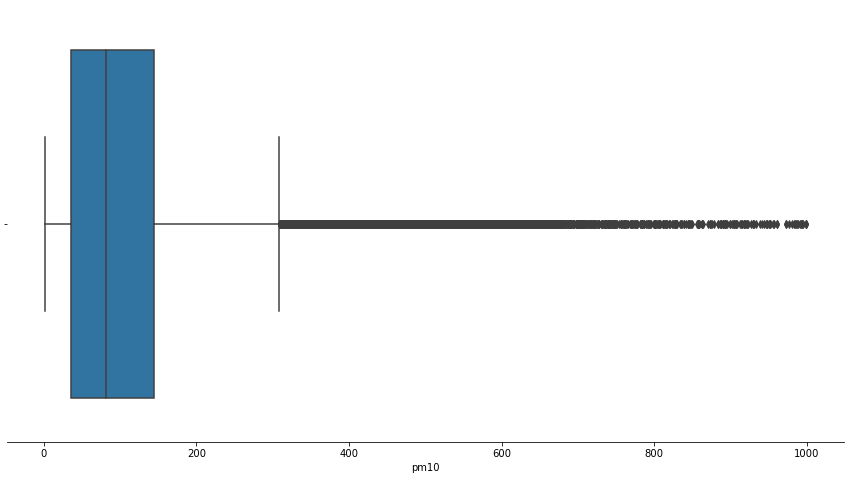

In [15]:
sns.boxplot(data=air_quality, x='pm10')
plt.show()

In [16]:
(air_quality.pm10 > 320).sum() # total pm10 values greater than 320

12708

In [17]:
pm10 = air_quality.loc[air_quality.pm10 > 320]

pm10.station.unique()

array(['Aotizhongxin', 'Changping', 'Dingling', 'Dongsi', 'Guanyuan',
       'Gucheng', 'Huairou', 'Nongzhanguan', 'Shunyi', 'Tiantan',
       'Wanliu', 'Wanshouxigong'], dtype=object)

In [18]:
((air_quality.pm25 > 250) & (air_quality.pm10 > 320)).sum()

9921

- This number implies that a majority of the instances with outliers possess outlying values in both PM25 and PM10 together, which means they could be related.

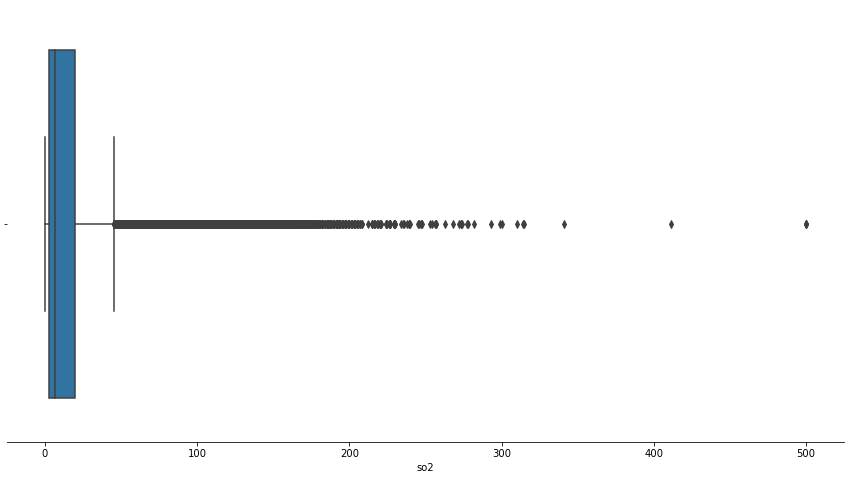

In [20]:
sns.boxplot(data=air_quality, x='so2')
plt.show()

In [21]:
(air_quality.so2 > 70).sum()

14014

In [22]:
((air_quality.pm25 > 250) & (air_quality.pm10 > 320) & (air_quality.so2 > 70)).sum()

2214

In [23]:
(air_quality.so2 > 300).sum()

8

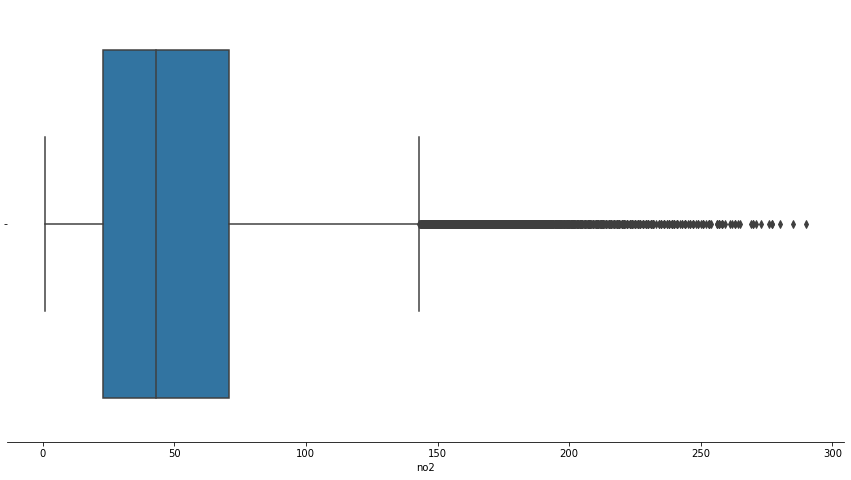

In [24]:
sns.boxplot(data=air_quality, x='no2')
plt.show()

In [25]:
(air_quality.no2 > 150).sum()

5267

In [26]:
((air_quality.pm25 > 250) & (air_quality.pm10 > 320) & (air_quality.so2 > 70) & (air_quality.no2 > 150)).sum()

667

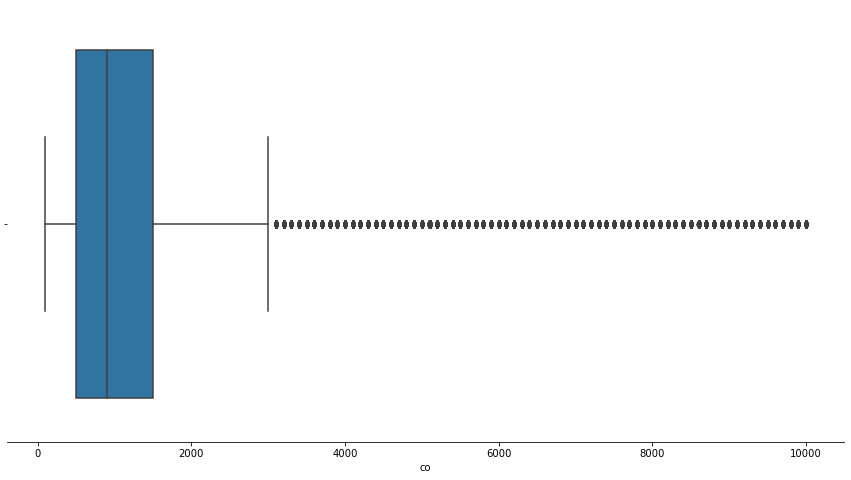

In [27]:
sns.boxplot(data=air_quality, x='co')
plt.show()

In [28]:
(air_quality.co > 3000).sum()

28054

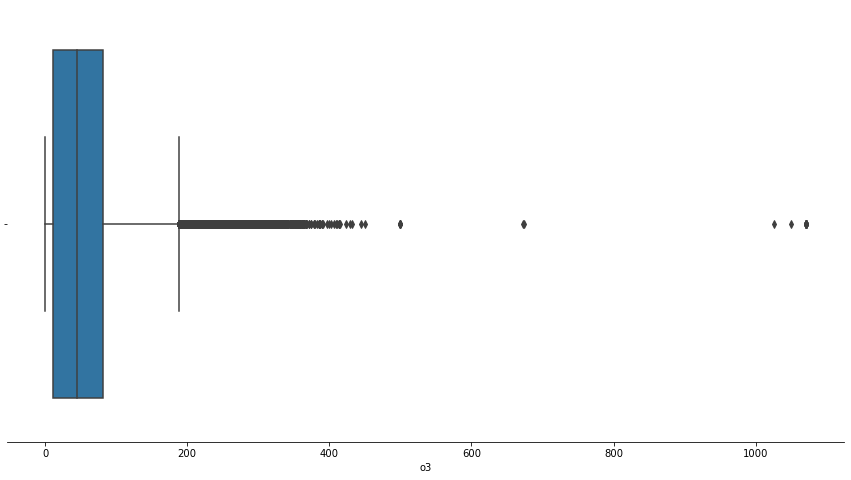

In [29]:
sns.boxplot(data=air_quality, x='o3')
plt.show()

In [30]:
(air_quality.o3 > 200).sum()

13088

In [31]:
(air_quality.o3 > 470).sum()

24

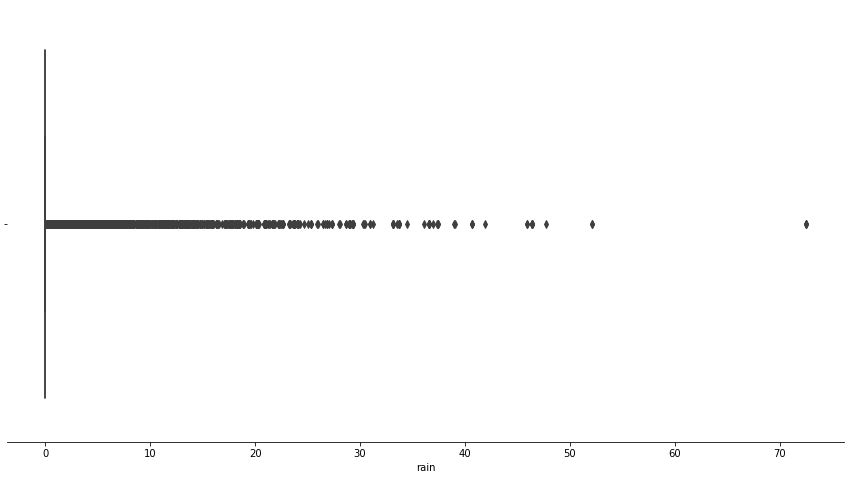

In [32]:
sns.boxplot(data=air_quality, x='rain')
plt.show()

In [33]:
air_quality.rain.value_counts(normalize=True)

0.0     0.960702
0.1     0.008854
0.2     0.004379
0.3     0.003288
0.4     0.002158
          ...   
36.1    0.000002
18.2    0.000002
26.7    0.000002
18.9    0.000002
22.4    0.000002
Name: rain, Length: 253, dtype: float64

In [35]:
# dropping 'rain' feature - it has around 96% of the times '0' value

air_quality.drop('rain', 1, inplace=True)

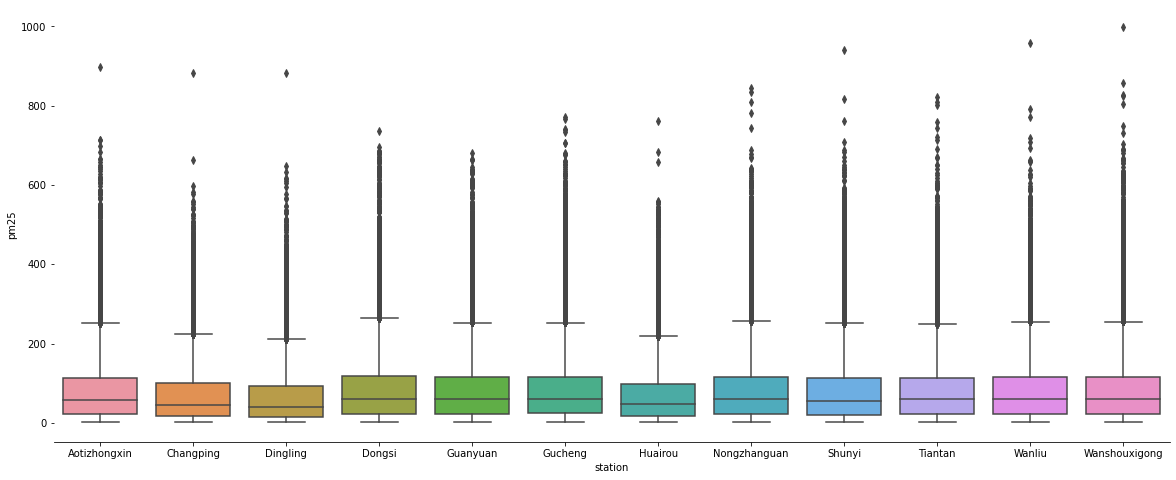

In [36]:
plt.rcParams['figure.figsize'] = [20, 8]


sns.boxplot(data=air_quality, x='station', y='pm25')
plt.show()

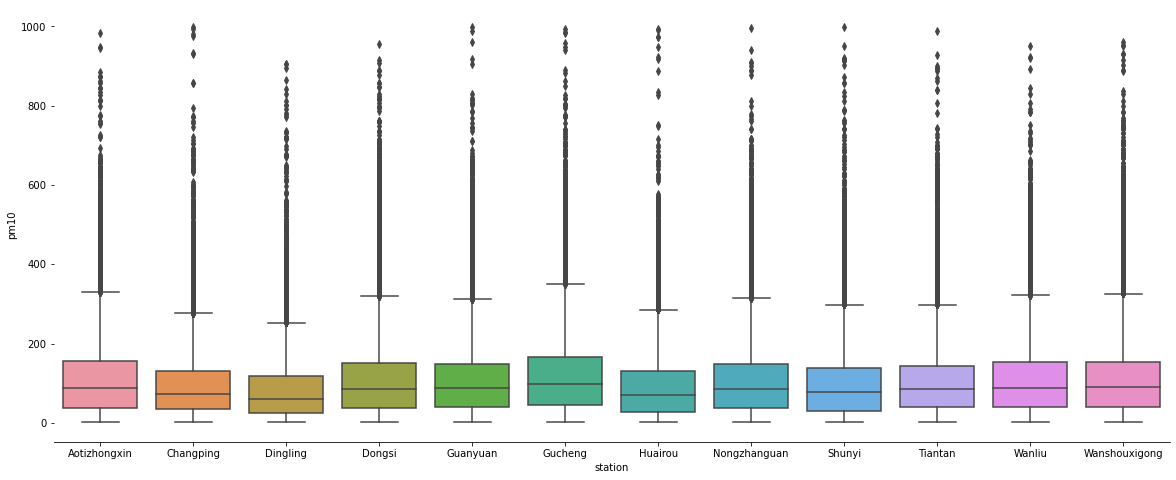

In [38]:
sns.boxplot(data=air_quality, x='station', y='pm10')
plt.show()

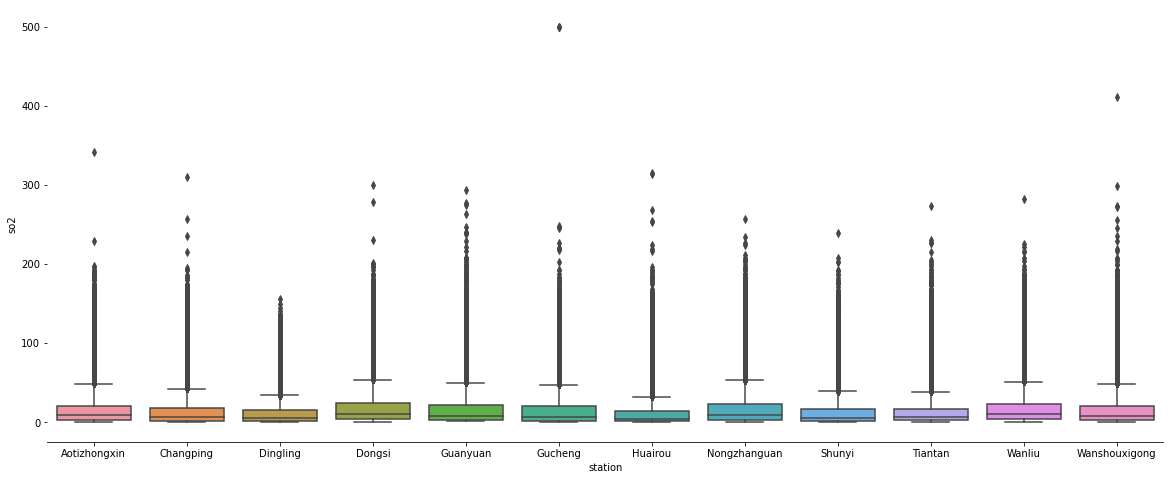

In [39]:
sns.boxplot(data=air_quality, x='station', y='so2')
plt.show()

- These look slightly more skewed. There are definite extreme outliers here, especially in the data for Gucheng. Even Changping, Dongsi, and Huairou have SO2 values that don't seem normal and are quite distant from the rest of the values.

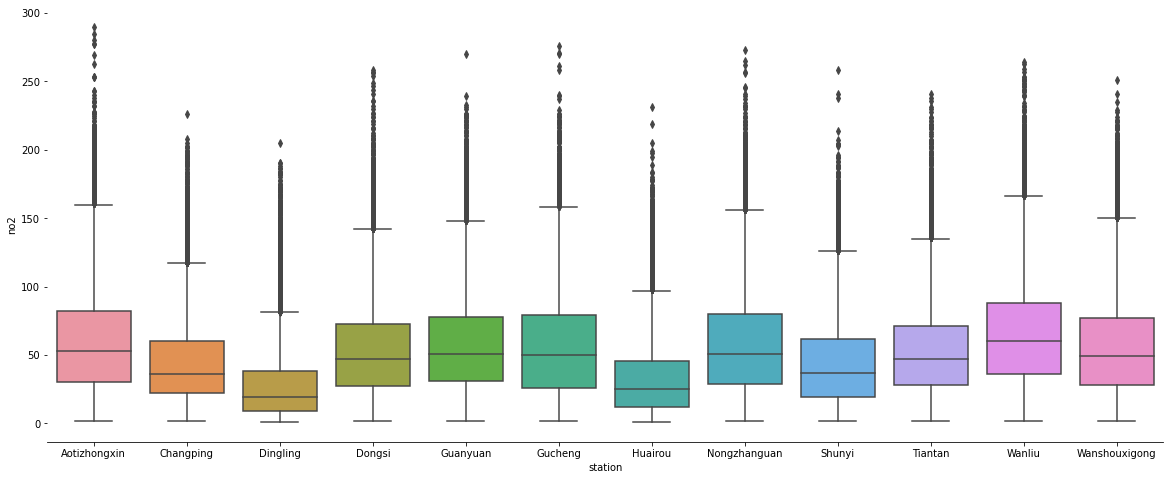

In [40]:
sns.boxplot(data=air_quality, x='station', y='no2')
plt.show()

- There is clear variation of No2 values in among all stations.

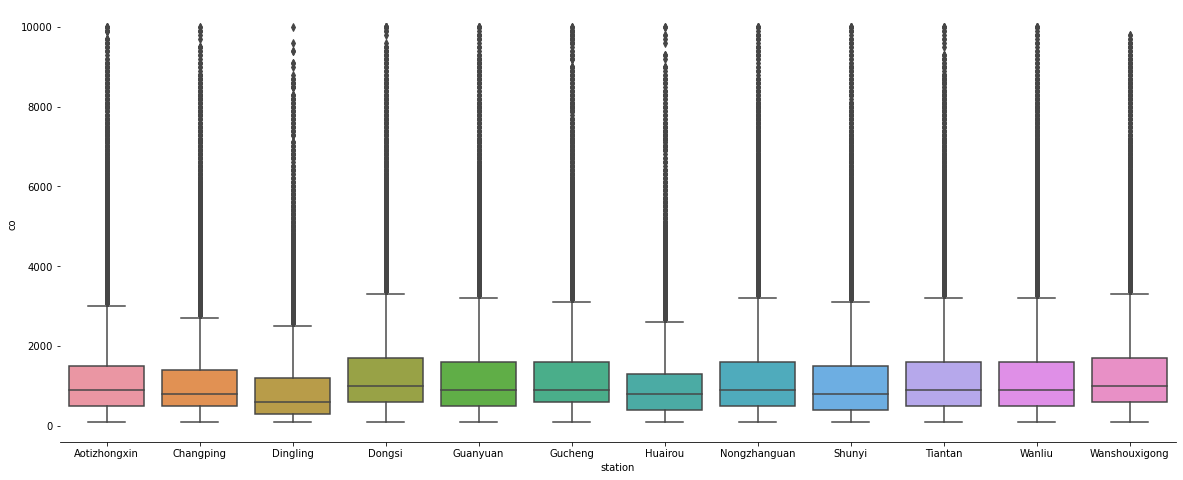

In [41]:
sns.boxplot(data=air_quality, x='station', y='co')
plt.show()

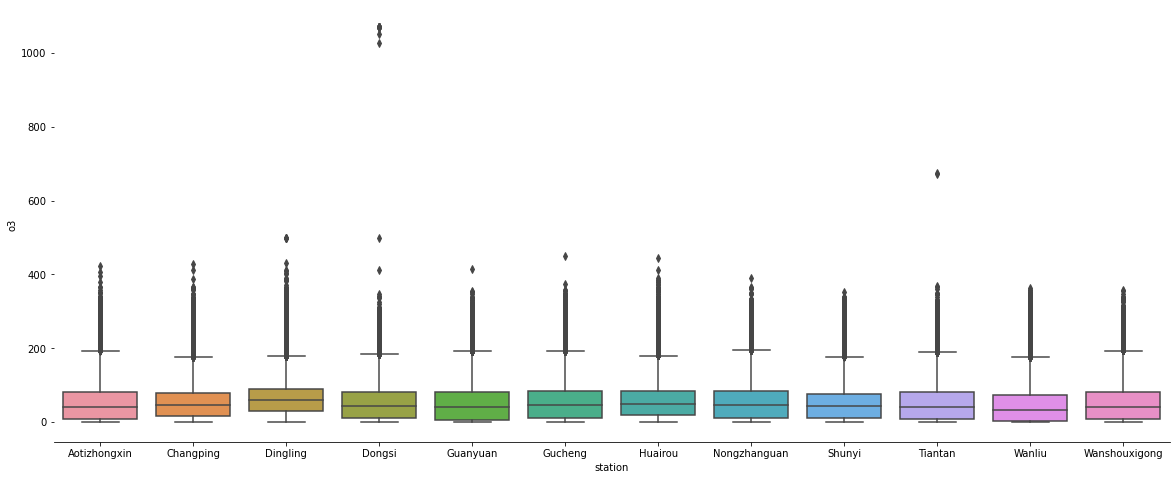

In [42]:
sns.boxplot(data=air_quality, x='station', y='o3')
plt.show()

- Clearly we can observe that Dongsi, and Tiantan station have some extreme outliers.

## <div style="background:#ffcea0; padding:1rem 2rem"> Missing Values </div>

In [43]:
# copy data in a new variable

new_air = air_quality.copy()

new_air.isna().sum()

year           0
month          0
day            0
hour           0
pm25        8739
pm10        6449
so2         9021
no2        12116
co         20701
o3         13277
temp         398
pres         393
dewp         403
wd          1822
wspm         318
station        0
dtype: int64

In [44]:
# replacing all null to their respective feature meadian value

new_air['pm25'] = (new_air
                   .groupby('station')['pm25']
                   .transform(lambda x: x.fillna(x.median())))


new_air['pm10'] = new_air.groupby('station')['pm10'].transform(lambda x: x.fillna(x.median()))
new_air['so2'] = new_air.groupby('station')['so2'].transform(lambda x: x.fillna(x.median()))
new_air['no2'] = new_air.groupby('station')['no2'].transform(lambda x: x.fillna(x.median()))
new_air['co'] = new_air.groupby('station')['co'].transform(lambda x: x.fillna(x.median()))
new_air['o3'] = new_air.groupby('station')['o3'].transform(lambda x: x.fillna(x.median()))
new_air['temp'] = new_air.groupby('station')['temp'].transform(lambda x: x.fillna(x.median()))
new_air['pres'] = new_air.groupby('station')['pres'].transform(lambda x: x.fillna(x.median()))
new_air['dewp'] = new_air.groupby('station')['dewp'].transform(lambda x: x.fillna(x.median()))
new_air['wspm'] = new_air.groupby('station')['wspm'].transform(lambda x: x.fillna(x.median()))

0

In [46]:
new_air.isna().sum()

year          0
month         0
day           0
hour          0
pm25          0
pm10          0
so2           0
no2           0
co            0
o3            0
temp          0
pres          0
dewp          0
wd         1822
wspm          0
station       0
dtype: int64

In [47]:
## Using mode to fill missing values in wd column

new_air['wd'] = new_air.groupby('station')['wd'].transform(lambda x: x.fillna(x.value_counts().index[0]))

In [48]:
new_air.isna().sum().sum()

0

## <div style="background:#ffcea0; padding:1rem 2rem"> Analysis </div>

### <div style="background:#98baff; padding:1rem 2rem">Observing the Concentration of PM25 and PM10 per Year</div>

In [49]:
year_pm25 = new_air.groupby(['year'], as_index=False)['pm25'].median()
year_pm10 = new_air.groupby(['year'], as_index=False)['pm10'].median()

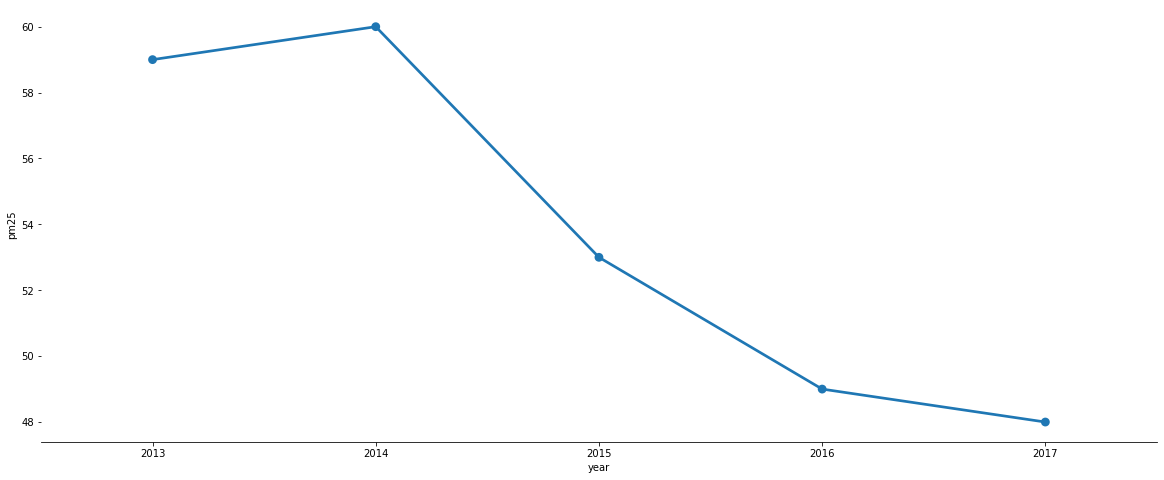

In [50]:
sns.pointplot(data=year_pm25, x='year', y='pm25')
plt.show()

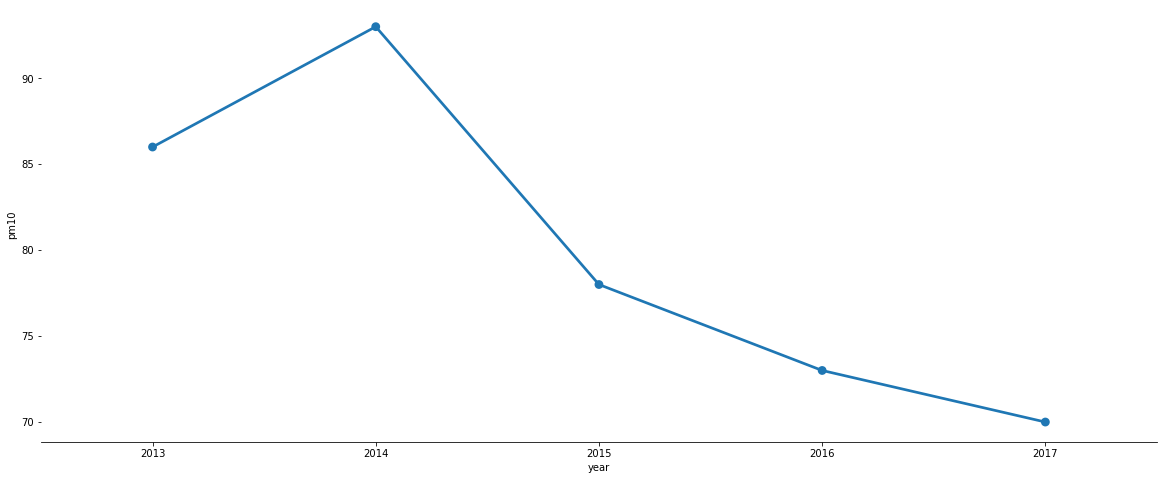

In [51]:
sns.pointplot(data=year_pm10, x='year', y='pm10')
plt.show()

### <div style="background:#98baff; padding:1rem 2rem">Observing the Pollutant Concentration per Year</div>

In [52]:
year_so2 = new_air.groupby(['year'], as_index=False)['so2'].median()
year_no2 = new_air.groupby(['year'], as_index=False)['no2'].median()
year_co = new_air.groupby(['year'], as_index=False)['co'].median()
year_o3 = new_air.groupby(['year'], as_index=False)['o3'].median()

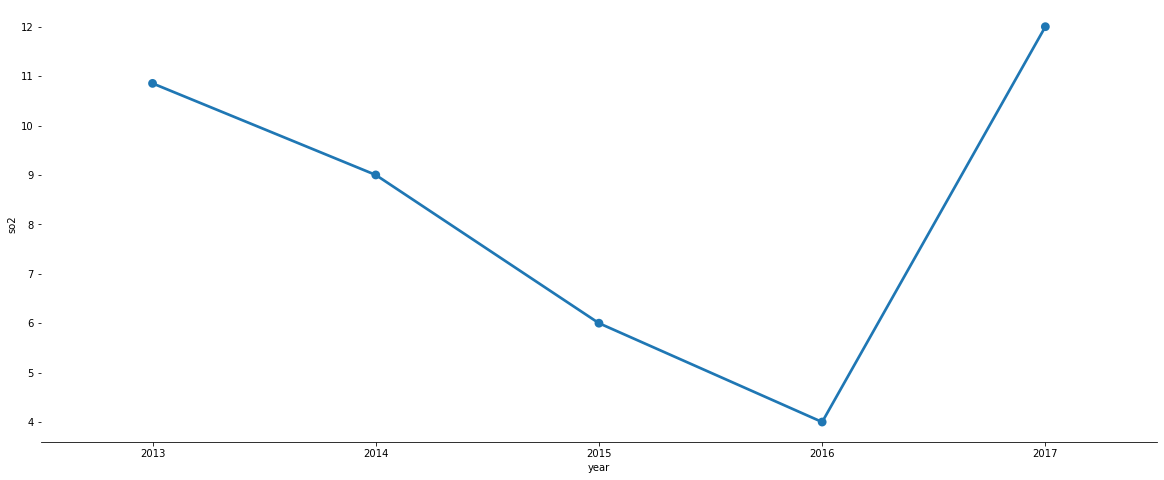

In [53]:
sns.pointplot(data=year_so2, x='year', y='so2')
plt.show()

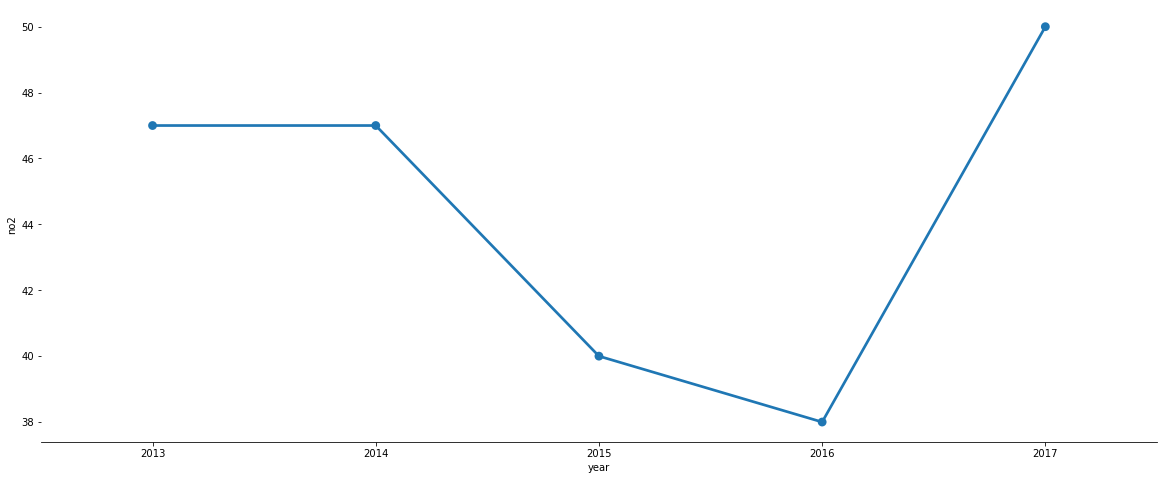

In [54]:
sns.pointplot(data=year_no2, x='year', y='no2')
plt.show()

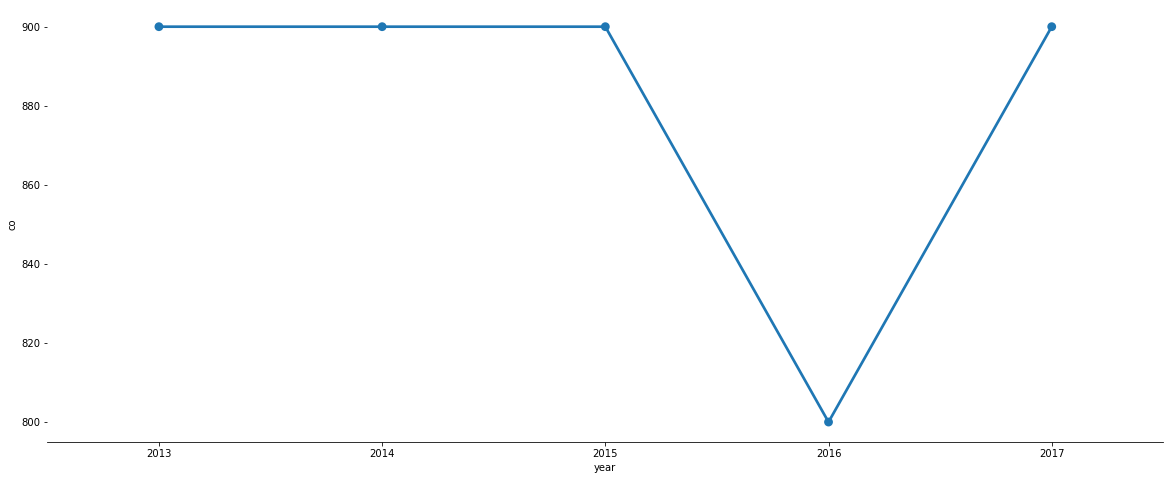

In [55]:
sns.pointplot(data=year_co, x='year', y='co')
plt.show()

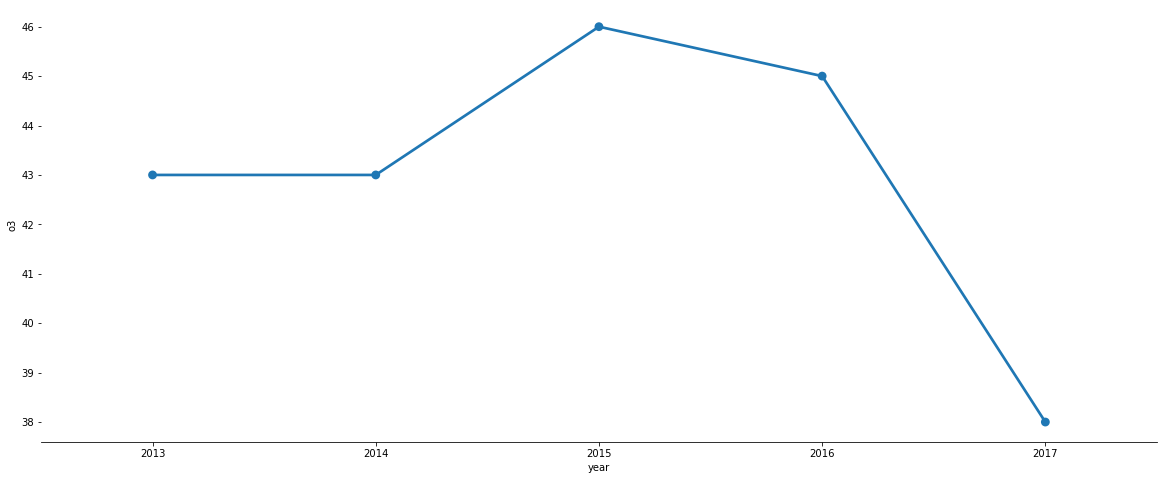

In [56]:
sns.pointplot(data=year_o3, x='year', y='o3')
plt.show()

### <div style="background:#98baff; padding:1rem 2rem">Observing Pollutant Concentration per Month</div>

In [57]:
month_pm25 = new_air.groupby(['month'], as_index=False)['pm25'].median()
month_pm10 = new_air.groupby(['month'], as_index=False)['pm10'].median()
month_so2 = new_air.groupby(['month'], as_index=False)['so2'].median()
month_no2 = new_air.groupby(['month'], as_index=False)['no2'].median()
month_co = new_air.groupby(['month'], as_index=False)['co'].median()
month_o3 = new_air.groupby(['month'], as_index=False)['o3'].median()

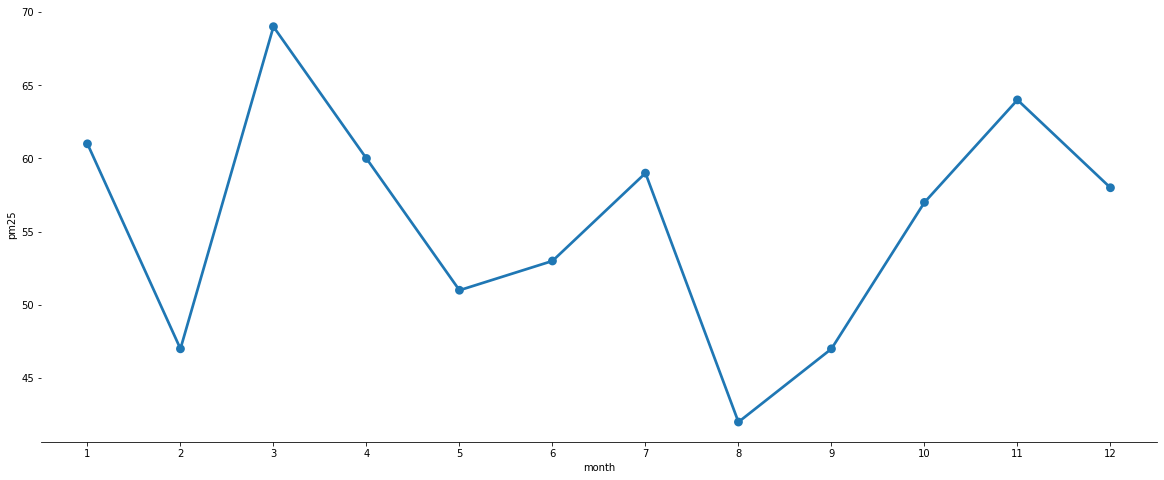

In [58]:
sns.pointplot(data=month_pm25, x='month', y='pm25')
plt.show()

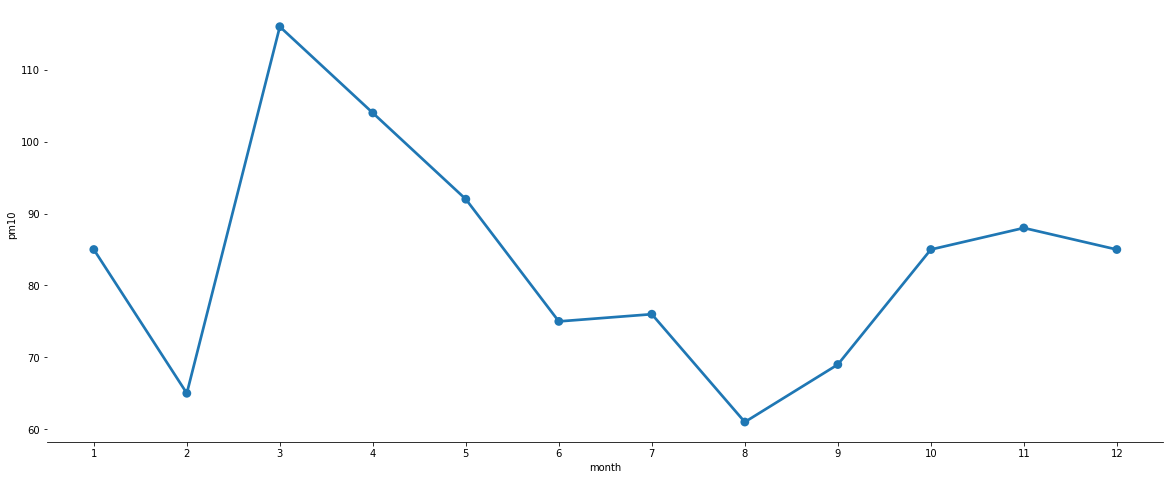

In [59]:
sns.pointplot(data=month_pm10, x='month', y='pm10')
plt.show()

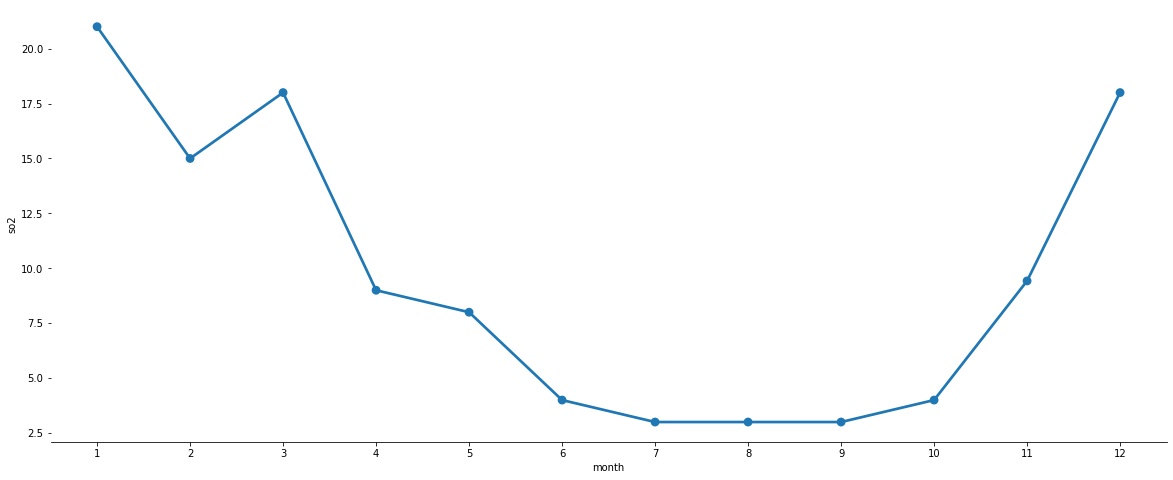

In [60]:
sns.pointplot(data=month_so2, x='month', y='so2')
plt.show()

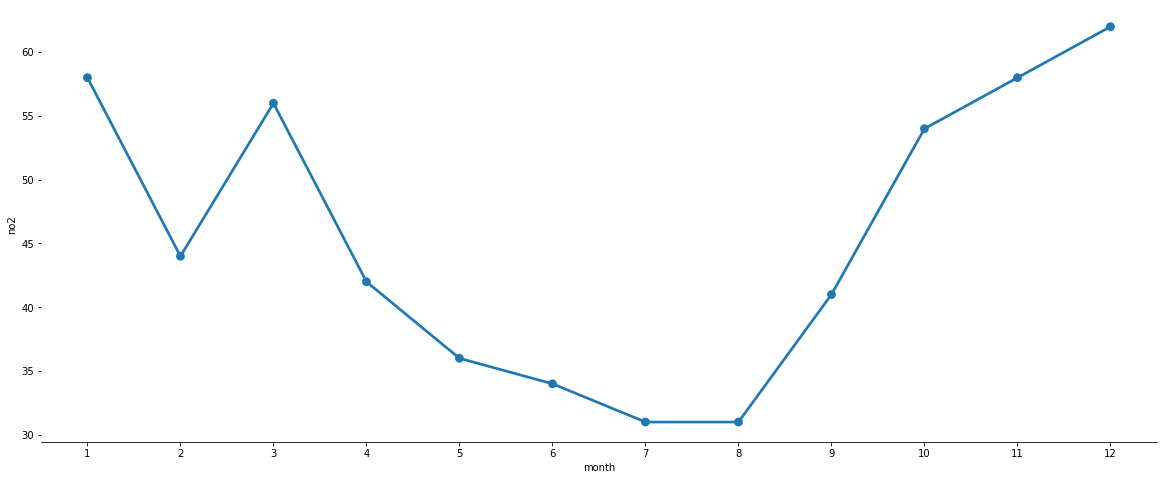

In [61]:
sns.pointplot(data=month_no2, x='month', y='no2')
plt.show()

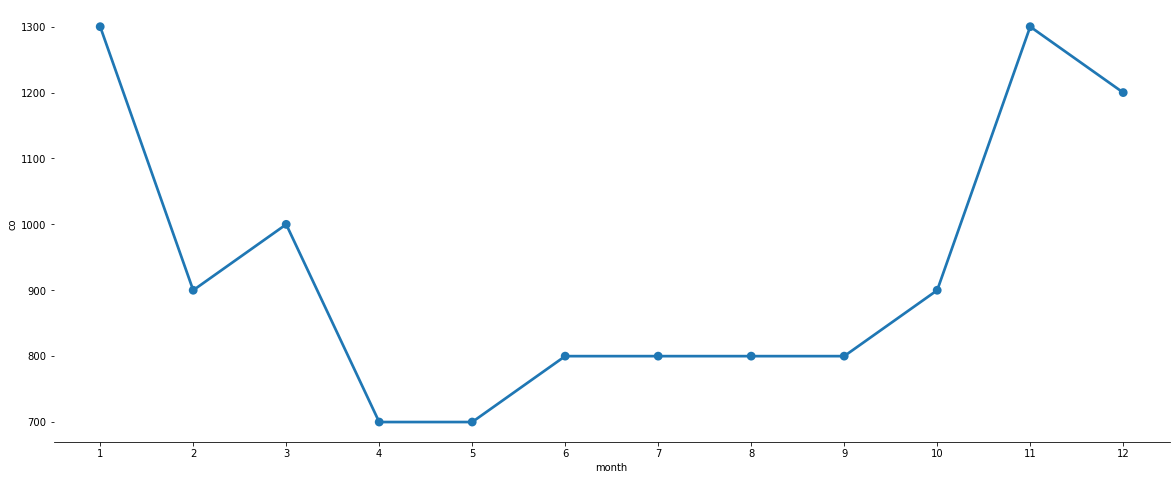

In [62]:
sns.pointplot(data=month_co, x='month', y='co')
plt.show()

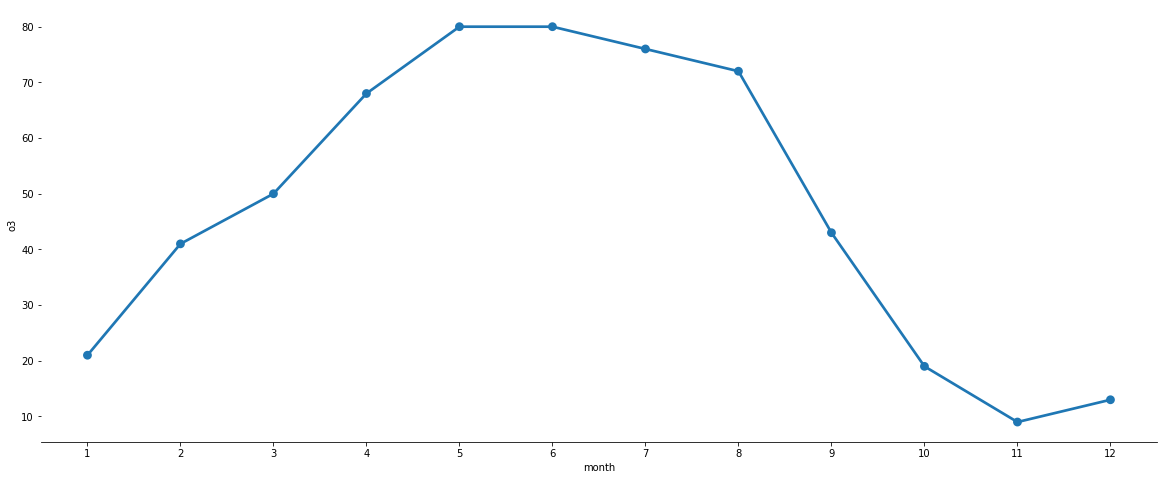

In [63]:
sns.pointplot(data=month_o3, x='month', y='o3')
plt.show()

### <div style="background:#98baff; padding:1rem 2rem">Correlation</div>

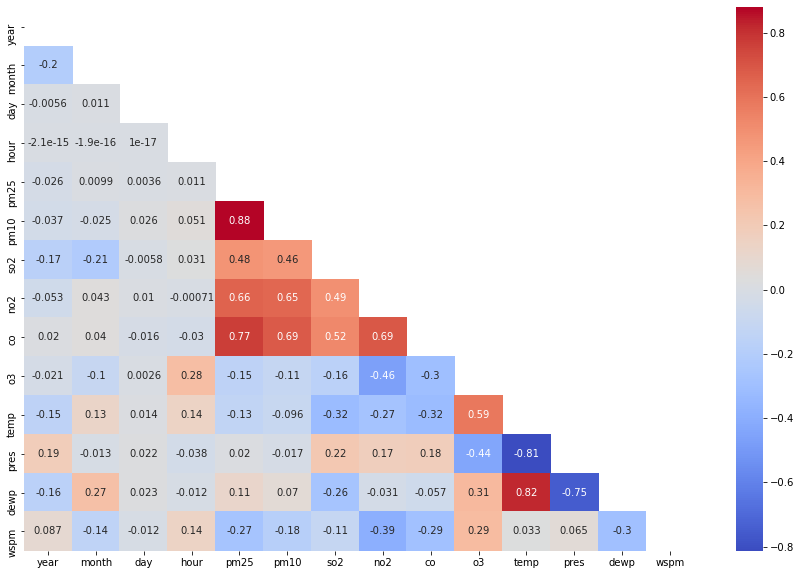

In [64]:
corr_matrix = new_air.corr()

plt.figure(figsize=(15, 10))

sns.heatmap(corr_matrix, annot=True, fmt='.2g', cmap='coolwarm', mask=np.triu(corr_matrix))
plt.show()

## <div style="background:#ffcea0; padding:1rem 2rem"> Summary </div>

-